### EDA

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from hdbscan import HDBSCAN
import seaborn as sns
import plotly_express as px
import geopandas as gpd
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from sklearn.model_selection import train_test_split as tts
from sklearn.neighbors import KNeighborsClassifier as KNNC
from PIL import Image

Loading dataset we'll be training with:

In [2]:
train = pd.read_csv('data/train.csv.zip')

In [3]:
train.shape #4167 rows & 74 columns
train.columns[:5]
train.shape

(4167, 74)

Vamos a justar las opciones del display para poder ver bien los datos

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [9]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,4167.0,2.083000e+03,1.203054e+03,0.000000e+00,1.041500e+03,2.083000e+03,3.124500e+03,4.166000e+03
scrape_id,4167.0,2.021121e+13,4.180189e-01,2.021121e+13,2.021121e+13,2.021121e+13,2.021121e+13,2.021121e+13
host_id,4167.0,8.968890e+07,1.158584e+08,3.159000e+03,9.002030e+06,3.133220e+07,1.354875e+08,4.346341e+08
host_listings_count,4167.0,2.488601e+00,1.450804e+01,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,7.180000e+02
host_total_listings_count,4167.0,2.488601e+00,1.450804e+01,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,7.180000e+02
neighbourhood_group_cleansed,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,4167.0,5.236691e+01,1.683493e-02,5.229103e+01,5.235666e+01,5.236659e+01,5.237655e+01,5.242476e+01
longitude,4167.0,4.891435e+00,3.617564e-02,4.753510e+00,4.869430e+00,4.888790e+00,4.908985e+00,5.026430e+00
accommodates,4167.0,2.941205e+00,1.464789e+00,0.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00,1.600000e+01
bathrooms,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
train.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,https://www.airbnb.com/rooms/2842228,20211205213126,2021-12-06,Your little appartment on wheels,A waggon luxurous designed as a hotel room on ...,"Waterland is a beautiful countryside area, wit...",https://a0.muscache.com/pictures/cc2aa51a-3c11...,3040748,https://www.airbnb.com/users/show/3040748,Henk,2012-07-24,"Amsterdam, North Holland, The Netherlands","Living in the countryside, just near Amsterdam...",within a few hours,100%,75%,f,https://a0.muscache.com/im/users/3040748/profi...,https://a0.muscache.com/im/users/3040748/profi...,NaN,13,13,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Amsterdam, North Holland, Netherlands",Noord-Oost,NaN,52.39508,4.99186,Private room in farm stay,Private room,3,NaN,1.5 shared baths,1.0,NaN,"[""First aid kit"", ""Free parking on premises"", ...",87.0,2,1125,2.0,2.0,1125.0,1125.0,2.0,1125.0,NaN,t,0,0,0,249,2021-12-06,81,0,0,2014-08-03,2019-06-15,4.62,4.56,4.29,4.57,4.75,4.69,4.49,0363 2A6D 7C09 877D 715F,f,10,0,10,0,0.91
1,1,https://www.airbnb.com/rooms/41236669,20211205213126,2021-12-06,Spacious 4p city center apartment (2 bedrooms!),Are you looking for a perfect place to stay in...,Our home is located in the Plantagebuurt. A un...,https://a0.muscache.com/pictures/5f33bf5a-399c...,34773624,https://www.airbnb.com/users/show/34773624,Julie,2015-06-01,"Amsterdam, Noord-Holland, Netherlands",NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/a5da3...,https://a0.muscache.com/im/pictures/user/a5da3...,Weesperbuurt en Plantage,0,0,"['email', 'phone', 'reviews']",t,f,"Amsterdam, Noord-Holland, Netherlands",Centrum-Oost,NaN,52.36371,4.90745,Entire rental unit,Entire home/apt,4,NaN,1 bath,2.0,2.0,"[""Hot water kettle"", ""Pocket wifi"", ""Stove"", ""...",250.0,2,1125,2.0,2.0,1125.0,1125.0,2.0,1125.0,NaN,t,3,3,3,3,2021-12-06,9,4,1,2020-01-26,2021-09-05,5.00,5.00,5.00,4.89,5.00,5.00,4.89,0363 BD0E 9934 ACCA D3DE,f,1,1,0,0,0.40
2,2,https://www.airbnb.com/rooms/27240740,20211205213126,2021-12-06,SWEETS hotel Theophile de Bockbrug,Comfortable bridge house on the doorstep of Am...,"The neighbourhood has a quiet, village-like fe...",https://a0.muscache.com/pictures/b1145dd1-e485...,203731852,https://www.airbnb.com/users/show/203731852,SWEETS Hotel,2018-07-20,"Wassenaar, South Holland, Netherlands",SWEETS hotel is a one-of-a-kind hotel located ...,within an hour,100%,97%,t,https://a0.muscache.com/im/pictures/user/492cd...,https://a0.muscache.com/im/pictures/user/492cd...,Hoofddorppleinbuurt,20,20,"['email', 'phone']",t,t,"Amsterdam, Noord-Holland, Netherlands",Zuid,NaN,52.35482,4.85329,Room in serviced apartment,Hotel room,2,NaN,1 private bath,1.0,1.0,"[""Air conditioning"", ""First aid kit"",

Aquí ya vemos varias columnas que podemos eliminar directamente porque no tienen informacion para nada relevante

In [7]:
train.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [12]:
compare = train[train['host_listings_count']== train['host_total_listings_count']]
compare[['host_listings_count','host_total_listings_count']].shape
#Las dos columnas son exactamente iguales, quitamos una

(4167, 2)

In [13]:
train.neighbourhood.nunique()#-->41 barrios!
print((train.neighbourhood.unique()))

['Amsterdam, North Holland, Netherlands'
 'Amsterdam, Noord-Holland, Netherlands' nan
 'Amsterdam, North-Holland, Netherlands' 'Amsterdam, NH, Netherlands'
 'Amsterdam, Netherlands' 'Netherlands'
 'Ouder-Amstel, Noord-Holland, Netherlands'
 'Amsterdam-Zuidoost, Noord-Holland, Netherlands'
 'Amsterdam, Haarlemmerbuurt, Netherlands'
 'Badhoevedorp, Noord-Holland, Netherlands'
 'Amsterdam-Zuidoost, North Holland, Netherlands'
 'Amsterdam, Frederiksstraat, Netherlands' 'Amsterdam, VX, Netherlands'
 'Amsterdam, Noord- Holland, Netherlands'
 'Amsterdam, The Netherlands, Netherlands'
 'Amsterdam, Netherlands, Netherlands'
 'Amsterdam Zuid-Oost, Noord-Holland, Netherlands'
 'Amsterdam, Noord-Holland 6, Netherlands'
 'Watergraafsmeer, North Holland, Netherlands'
 '1054 ZV, Noord-Holland, Netherlands'
 'Jordaan, North Holland, Netherlands'
 'Amsterdam, Nord Holland, Netherlands'
 'Amstelveen, Noord-Holland, Netherlands'
 'Amsterdam, Emmy andriessestraat, Netherlands'
 'Landsmeer, Noord-Holland, 

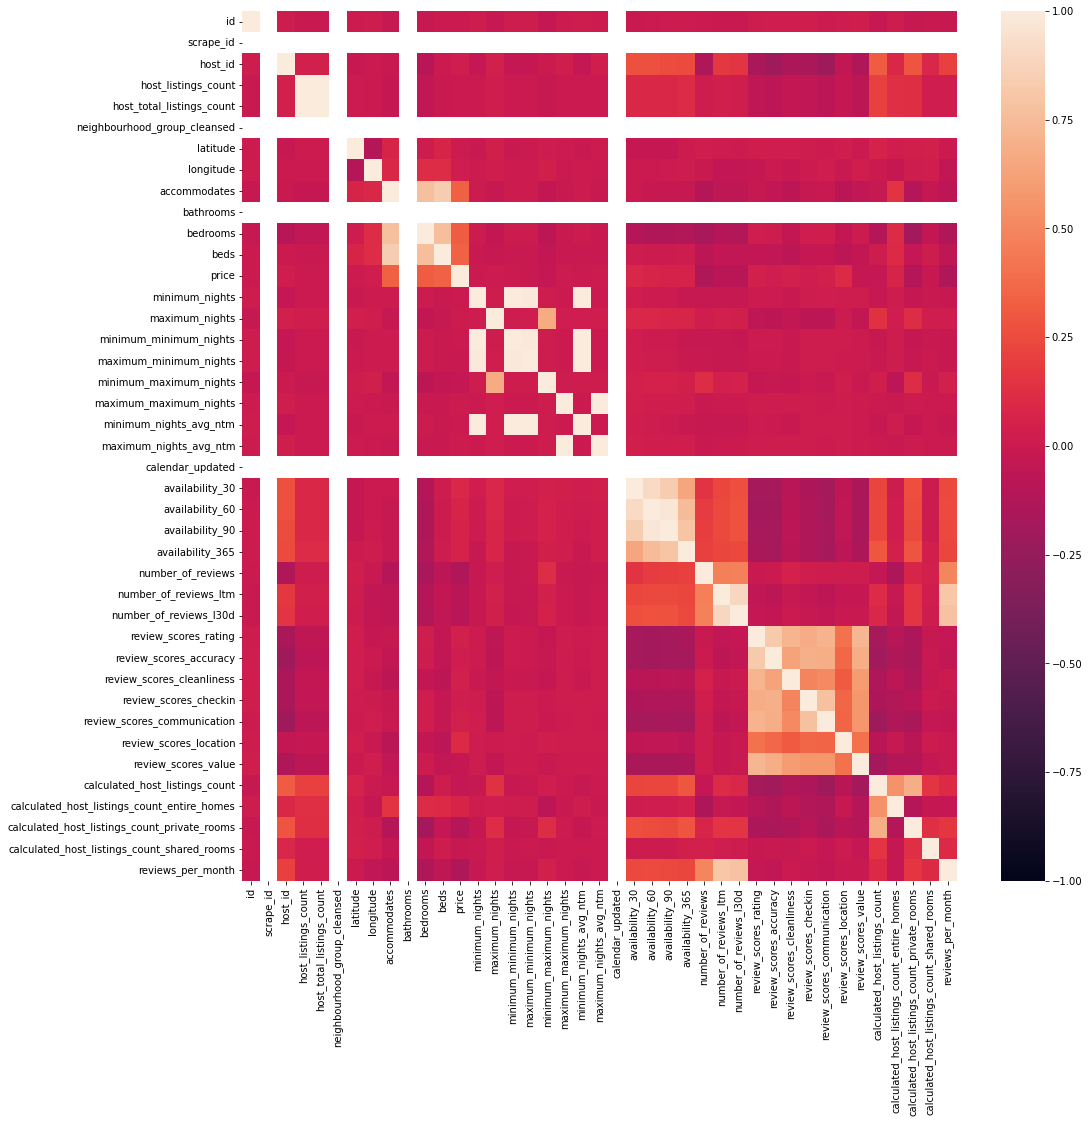

In [19]:
plt.figure(figsize=(16,16)) 
corrMatrix = train.corr()
sns.heatmap(corrMatrix,
            annot=False,
            vmax=1,
            vmin=-1)

plt.show()

Ya vemos varias columnas en blanco que nos indican que están vacías, vamos a verlas en detalle y ordenadas:

In [20]:
nan_rank = train.isna().sum() #Most to least Nans columns
nan_rank[nan_rank.values > 0].sort_values(ascending=False)

neighbourhood_group_cleansed    4167
calendar_updated                4167
bathrooms                       4167
host_neighbourhood              1786
host_about                      1512
host_response_time              1413
host_response_rate              1413
neighbourhood                   1163
neighborhood_overview           1163
host_acceptance_rate            1092
review_scores_communication      385
review_scores_location           385
review_scores_value              385
review_scores_checkin            385
review_scores_accuracy           385
review_scores_cleanliness        385
first_review                     377
last_review                      377
reviews_per_month                377
review_scores_rating             377
bedrooms                         253
beds                             174
license                           32
host_location                     12
description                        8
bathrooms_text                     8
maximum_nights_avg_ntm             1
m

 ## Miramos la columna PRICE:

In [16]:
train['price'].describe().T

count    4167.000000
mean      168.676986
std       180.658555
min         0.000000
25%        98.000000
50%       138.000000
75%       200.000000
max      6477.000000
Name: price, dtype: float64

In [21]:
int(train['price'].max()),int(train['price'].min()) # FREE acomodations!! yay!! - probably scrape errors

(6477, 0)

Hay 4 localizaciones que por lo visto son gratuitas, comprobado a través de las url que son errores, asumimos que de escrapeo

In [27]:
freebies = train[train['price'] == 0] #4 free acomodations
freebies.shape

(4, 74)

Vamos a echar un ojo a la distribucion de los precios:

<AxesSubplot:>

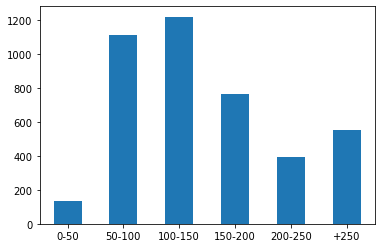

In [26]:
prices = pd.cut(train['price'],
                bins = [0, 50, 100, 150, 200, 250, train["price"].max()],
                labels=["0-50", "50-100", "100-150", "150-200", "200-250", "+250"]) 
prices.value_counts().sort_index().plot(kind="bar", rot = 0)

In [31]:
cortado = train[train['price']<250]
cortado.price.shape[0]/train.shape[0]

0.8454523638108952

Casi el 85% de los datos, está por debajo de 250€ -- hay muchos Outlliers.
He optado por entrenar modelos sin ellos, asumiento que la distribucion de ellos en el test será pareja. Por lo que opto por afinar mas las predicciones en los inliners y fallar los outliers.

## PLOTTING LOCATIONS MAP (Mapbox)

In [ ]:
px.scatter_geo(train,cortado.latitude,cortado.longitude, color=cortado.price ,fitbounds='locations')

In [ ]:
train['geo'] = train['latitude'].map(str) + ',' + train['longitude'].map(str)
train['geo'].sample()

In [ ]:
#locator = Nominatim(user_agent='myGeocoder')
#coordinates = '53.480837, -2.244914' #EJEMPLO# 
#location = locator.reverse(coordinates)
#location.raw

In [ ]:
geolocator = Nominatim(user_agent='myGeocoder')
location = geolocator.reverse

In [ ]:
#location(train.geo[2]) #Funcionando

In [ ]:
#NO RULA demasiado tiempo intentando obtener el dato

#train['address'] = train['geo'].apply(location)


Quick histplot of prices

In [ ]:
#prices = pd.cut(train['price'],
#                bins = [0, 50, 100, 150, 200, 250, train["price"].max()],
#                labels=["0-50", "50-100", "100-150", "150-200", "200-250", "+250"])
# 
#prices.value_counts().sort_index().plot(kind="bar", rot = 0)#

In [ ]:
#mayoria = train[train['price']<=250].shape[0]
#total = train.shape[0]
#mayoria/total #Casi el 87% de los precios estan por debajo de 250€

## DROPPING OUTLIERS:

In [ ]:
#Esto no lo haremos sobre el test, solo para entreanar:
#def dropouts(df, column):
#    IQR = 1.5* (np.percentile(df[column],75)) - (np.percentile(df[column],25))
#    df.drop(df[df[column] > (IQR + np.percentile(df[column], 75))].index, inplace=True)
#    df.drop(df[df[column] < (np.percentile(df[column], 25)- IQR)].index, inplace=True)
#    print('Dropeados!')

In [ ]:
#Nos cepillamos los outliers de price:
#dropouts(train, 'price')

In [ ]:
###

In [ ]:
train.shape

### LOOKING @ COLUMNS

How does our df's rows look like?
Just like <code>df.head(1)</code>, but nicer ;)

In [ ]:
train.sample()

In [ ]:
#train.iloc[train['id'][0]] 

NaN values

In [ ]:
nan_rank = train.isna().sum() #Most to least Nans columns
nan_rank[nan_rank.values > 0].sort_values(ascending=False)

In [ ]:
avg_price_superhost = train.groupby('host_is_superhost').mean()["price"]
avg_price_superhost.plot(kind="bar")
plt.title("Avg. Price by host is superhost ")
plt.show()

Al contrario de lo que podríamos esperar, el precio varía en funcion de si el host es Super o No pero
aunque de manera inversa a lo esperable

In [ ]:
#plt.xticks(rotation=90)

avg_price_host_veri = train.groupby('host_identity_verified').mean()["price"]
avg_price_host_veri.plot(kind="bar")
plt.title("Avg. Price by host is verified ")
plt.show()

### ver como hacer casteo del host acceptance rate porque no me sale ni a palos

In [ ]:
#train.host_acceptance_rate.astype(str)
#train.host_acceptance_rate.dtypes

#train.host_acceptance_rate = train.host_acceptance_rate.astype(str)#
#
#acc = pd.cut(train['host_acceptance_rate'],
#                bins = [0, 20, 40, 60, 80, 100],
#                labels=["0-20", "20-40", "40-60", "60-80", "80-100"])
# 
#acc.value_counts().sort_index().plot(kind="bar", rot = 0)

#avg_price_acc = train.groupby('host_acceptance_rate').mean()["price"]
#avg_price_host_veri.plot(kind="bar")
#plt.title("Avg. Price by host is verified ")
#plt.show()

In [ ]:
type(train.host_acceptance_rate[0])

## CLUSTERIZANDO LATITUDE Y LONGITUD

### CON HDBSCAN

In [ ]:
#0.01 / 6378

### HABLAR CON YONA PARA VER TEMA DE MANTENER LOS GRUPOS CLUSTERIZADOS ANTERIORMENTE:

In [ ]:
#latitude y longitud los vamos a clusterizar con DBSCAN: --> METIDO EN UNA FUNCION
#!pip install hdbscan

#hdbscan=HDBSCAN(min_cluster_size=3,min_samples=2,cluster_selection_epsilon=0.01,
                #allow_single_cluster=False,prediction_data=True,leaf_size=30)
      
#help(hdbscan)
##PARAMS
#algorithm='best', alpha=1.0, approx_min_span_tree=True,
#    gen_min_span_tree=False, leaf_size=40, memory=Memory(cachedir=None),
#    metric='euclidean', min_cluster_size=5, min_samples=None, p=None

Cuales son la etiquetas de HDBSCAN??

In [ ]:
#train.head()

In [ ]:
#test=pd.read_csv('data/test.csv.zip') #Cargamos el test para ver como clusteriza los nuevos puntos

In [ ]:
#test_points = np.column_stack((test['longitude'],test['latitude']))

In [ ]:
#test_labels, strengths = hdbscan.prediction.approximate_predict(clasi, test_points)
#test_labels = clasi.approximate_predict(clasi, test_points)

In [ ]:
#help(clasi)

### FUNCION LIMPIEZA:

In [ ]:
import funciones as f

In [ ]:
train.beds.isna().sum()

MIRAR BIEN LO DE CATS / QUE SOLO COGE EL PRIMER
MIRAR TB LO DE LOS AMENITIES QUE ME LOS HE CEPILLADO


In [ ]:
#avg_price_host_since = train.groupby('host_since_year').mean()["price"]
#avg_price_host_since.plot(kind="bar")
#plt.title("Avg. Price by host since year")
#plt.show()

# H2O

In [ ]:
train_ready = f.clean(train)
train_ready.columns

In [ ]:
import h2o
from h2o.automl import H2OAutoML

In [ ]:
h2o.init(
    nthreads=-1,     # number of threads when launching a new H2O server
    max_mem_size=8,# in gigabytes
)

In [ ]:
train_H2o = h2o.H2OFrame(train_ready)

In [ ]:
y = "price" #Target a predecir
splits = train_H2o.split_frame(ratios = [0.85], seed = 42) #Hacemos tts a pelo
train = splits[0]
test = splits[1]

In [ ]:
aml = H2OAutoML(seed=10, max_models = 30, max_runtime_secs = 100000000000000000099999999223500,
                max_runtime_secs_per_model = 999999999993600)
aml.train(y = y, training_frame = train, leaderboard_frame = test)

In [ ]:
lb = aml.leaderboard
lb

perf = aml.leader.model_performance(test)


In [ ]:
#ENTRENAMIENTO CON DATA SET COMPLETO
#aml.leader.train(y = y, training_frame = train_H2o)

In [ ]:
#test = pd.read_csv('data/test.csv.zip')

In [ ]:
#f.clean(test)

In [ ]:
#testh2o = h2o.H2OFrame(test)
#prediccion_test_completo = aml.leader.predict(testh2o)

In [ ]:
#QUIETO

In [ ]:
#predict = h2o.as_list(prediccion_test_completo)
#f.export(predict,'modelo7')

In [ ]:
#predict.to_csv(("data/{}.csv".format(nombre)))
#sample = pd.read_csv('data/sample.csv')
#sample.price = predict.predict  #Cambiamos columna price por la Series de Pandas que tenemos
#sample.to_csv('data/modelo4_predict.csv', index = False)

In [ ]:
#Viendo los insgiths de las columnas que me da modelo 4 me puedo cepillar la mitad

## PYCARET

In [ ]:
from pycaret.regression import *

In [ ]:
train_ready = f.clean(train)
train_ready.head()

In [ ]:
#data = train_ready(frac=0.9, random_state=42)
#data_unseen = train_ready.drop(data.index)
#
#data.reset_index(drop=True, inplace=True)
#data_unseen.reset_index(drop=True, inplace=True)
#
#s = setup(data = data, target = 'price', session_id=123)#

In [ ]:
#f.clean(test)

## SGR

In [ ]:
train = pd.read_csv('data/train.csv.zip')
test = pd.read_csv('data/test.csv.zip')

In [ ]:
train_ready = f.clean(train)
train_ready.head()

In [ ]:
train_ready.columns

In [ ]:
test_ready = f.clean(test)
test_ready.shape

In [ ]:
from sklearn.linear_model import SGDRegressor as SGDR

X_train_d, X_test_d, y_train_d, y_test_d = tts(train_ready.drop('price', axis=1), 
                                               train_ready.price)

In [ ]:
sgdr=SGDR(max_iter=50000)

In [ ]:
def regre(modelo):
    
    modelo.fit(X_train_d, y_train_d)
    
    train_score = modelo.score(X_train_d, y_train_d)  # R2
    test_score = modelo.score(X_test_d, y_test_d)
    
    print(modelo)
    print('Train R2:', train_score)
    print('Test R2:', test_score)
    
    return modelo

In [ ]:
X_test_d.head()

In [ ]:
sgdr=regre(sgdr)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor as KNNR

In [ ]:
knnr=KNNR(n_neighbors=5, weights='distance')

knnr=regre(knnr)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor as GBR

In [ ]:
gbr=GBR(n_estimators=200, learning_rate=0.03)

gbr=regre(gbr)

In [ ]:
EXPORTACION

In [ ]:
predict.to_csv(("data/{}.csv".format(nombre)))
sample = pd.read_csv('data/sample.csv')
sample.price = predict.predict  #Cambiamos columna price por la Series de Pandas que tenemos
sample.to_csv('data/modelo4_predict.csv', index = False)